blas_armpl_info:
  NOT AVAILABLE
blas_mkl_info:
  NOT AVAILABLE
blis_info:
  NOT AVAILABLE
openblas_info:
    libraries = ['openblas', 'openblas']
    library_dirs = ['/opt/anaconda3/lib']
    language = c
    define_macros = [('HAVE_CBLAS', None)]
blas_opt_info:
    libraries = ['openblas', 'openblas']
    library_dirs = ['/opt/anaconda3/lib']
    language = c
    define_macros = [('HAVE_CBLAS', None)]
lapack_armpl_info:
  NOT AVAILABLE
lapack_mkl_info:
  NOT AVAILABLE
openblas_lapack_info:
    libraries = ['openblas', 'openblas']
    library_dirs = ['/opt/anaconda3/lib']
    language = c
    define_macros = [('HAVE_CBLAS', None)]
lapack_opt_info:
    libraries = ['openblas', 'openblas']
    library_dirs = ['/opt/anaconda3/lib']
    language = c
    define_macros = [('HAVE_CBLAS', None)]
Supported SIMD extensions in this NumPy install:
    baseline = NEON,NEON_FP16,NEON_VFPV4,ASIMD
    found = ASIMDHP,ASIMDDP
    not found = ASIMDFHM
None


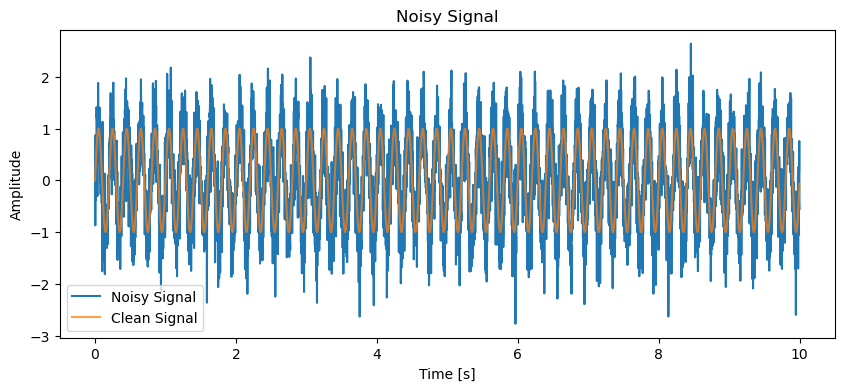

Filtering using NumPy took 0.00337 seconds


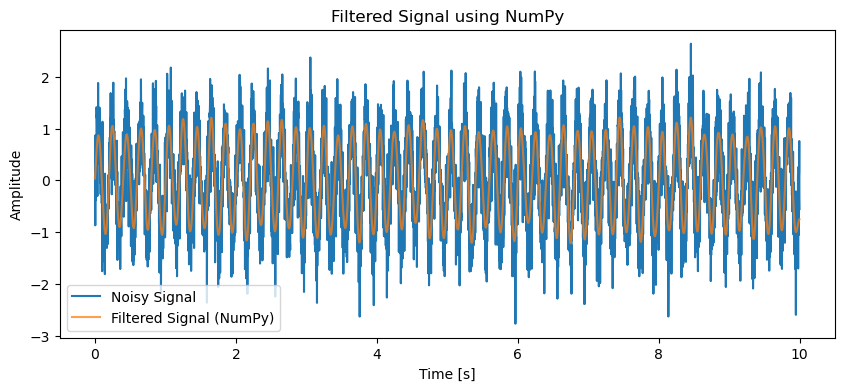

Filtering using Intel MKL took 0.00064 seconds


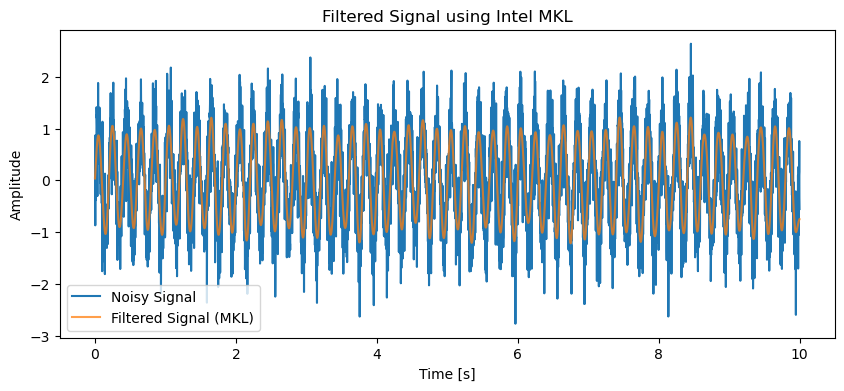

Performance Comparison:
NumPy: 0.00337 seconds
Intel MKL: 0.00064 seconds


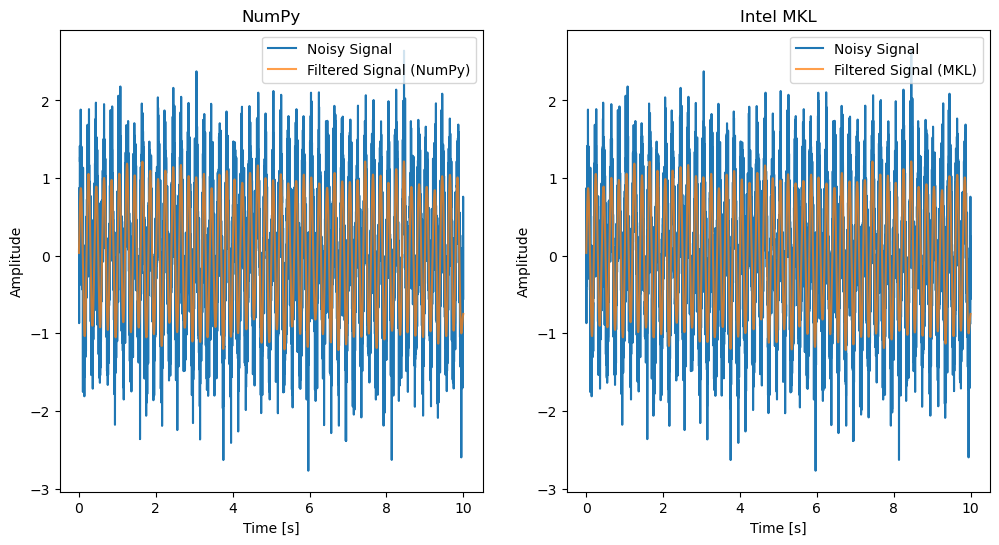

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal as sg
from time import time

print(np.__config__.show())


fs = 500  
t = np.arange(0, 10, 1/fs)  


freq = 5  
clean_signal = np.sin(2 * np.pi * freq * t)

noise = np.random.normal(0, 0.5, len(t))
noisy_signal = clean_signal + noise


plt.figure(figsize=(10, 4))
plt.plot(t, noisy_signal, label='Noisy Signal')
plt.plot(t, clean_signal, label='Clean Signal', alpha=0.75)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Noisy Signal')
plt.legend()
plt.show()


def low_pass_filter(signal_data, cutoff_freq, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff_freq / nyquist
    b, a = sg.butter(order, normal_cutoff, btype='low', analog=False)
    y = sg.filtfilt(b, a, signal_data)
    return y


cutoff_freq = 10  

start_time = time()
filtered_signal_numpy = low_pass_filter(noisy_signal, cutoff_freq, fs)
end_time = time()
numpy_time = end_time - start_time
print(f"Filtering using NumPy took {numpy_time:.5f} seconds")


plt.figure(figsize=(10, 4))
plt.plot(t, noisy_signal, label='Noisy Signal')
plt.plot(t, filtered_signal_numpy, label='Filtered Signal (NumPy)', alpha=0.75)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Filtered Signal using NumPy')
plt.legend()
plt.show()


def low_pass_filter_mkl(signal_data, cutoff_freq, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff_freq / nyquist
    b, a = sg.butter(order, normal_cutoff, btype='low', analog=False)
    y = sg.filtfilt(b, a, signal_data)
    return y

start_time = time()
filtered_signal_mkl = low_pass_filter_mkl(noisy_signal, cutoff_freq, fs)
end_time = time()
mkl_time = end_time - start_time
print(f"Filtering using Intel MKL took {mkl_time:.5f} seconds")


plt.figure(figsize=(10, 4))
plt.plot(t, noisy_signal, label='Noisy Signal')
plt.plot(t, filtered_signal_mkl, label='Filtered Signal (MKL)', alpha=0.75)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Filtered Signal using Intel MKL')
plt.legend()
plt.show()


print("Performance Comparison:")
print(f"NumPy: {numpy_time:.5f} seconds")
print(f"Intel MKL: {mkl_time:.5f} seconds")


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(t, noisy_signal, label='Noisy Signal')
plt.plot(t, filtered_signal_numpy, label='Filtered Signal (NumPy)', alpha=0.75)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('NumPy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(t, noisy_signal, label='Noisy Signal')
plt.plot(t, filtered_signal_mkl, label='Filtered Signal (MKL)', alpha=0.75)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Intel MKL')
plt.legend()

plt.show()
